#Lecture 1

##Slide 32- Curse of dimensionality 


How long Exhaustive Search Would run in 10-D

we will divide each dimention to 100 on interval $[0,1]$ points which gives a total $10^{20}$ points in 10-D

In [1]:
import timeit
timeit.timeit('import numpy as np; np.sum(np.ones(10)*np.ones(10))', number=10**6)

21.869852888000004

Running $10^6$ function evaluations on the function $\sum_{i = 1}^{10} x_i^2$ took around 11 seconds imagine ow it will be for $10^{20}$ 

#Lecture 2


##Exercise I: Pure Random Search (PRS)

We defined a random search, on a search space $[-a,a]^n\to \mathbb{R}$ with two inputs $\{a, f,n,Tmax\}$ where $a$ is the domain of the seach space , $f$ is the objective function, n is the dimension, Tmax is the maximum number of iterations, and the function.

In [2]:
import numpy as np
def random_search(a,f,Tmax,n): # input the domain objective max iteration and dimension
  t=1
  X = np.random.uniform(-a,a,n) # uniformly distributed vector 
  while t<=Tmax:
    t+=1
    U = np.random.uniform(-a,a,n)
    if f(U) <= f(X):  # update the value
      X = U
  print(f(X))
  return f(X)

In [3]:
def f_abs(y):
  a=0
  for i in range(len(y)):
    a+=(y[i])**2
  return a

In [4]:
random_search(5,f_abs,200,2)

0.09192109698117867


0.09192109698117867

In [5]:
array = []
iteration = []
for i in range(50):
   u = random_search(5,f_abs,i+1,5)
   iteration.append(i)
   array.append(u)
import matplotlib.pyplot as plt


22.805332314349634
25.756821416820284
20.525021402047745
22.763745203531474
16.72080018037991
29.86781101270298
39.993847330743165
11.877063702498772
20.672114840553313
18.382407209043514
28.754580531851513
8.756999398058888
12.080388046864535
7.550466239321725
15.435887348502172
18.346558482920006
1.9121122432788478
19.107215889079036
11.548361230769745
5.634781188069028
9.532547559158624
17.17056728199476
13.800266355058623
9.171145411185883
16.925629722023874
22.384561779754318
12.610155647206376
6.545974986787159
2.3690029624313604
6.891763908458962
12.019677179956595
4.695223511752382
6.569630210587125
9.274376720251
4.802793581372186
11.053415325148718
13.65380752018841
14.644512559761795
7.4649242458110985
6.041263810756886
5.5645295798004994
12.193384393401141
16.189016177908577
6.420424577004036
18.301140372503905
5.993980665872318
11.430988093226338
9.680505946455835
16.885160128448856
9.248291445212026


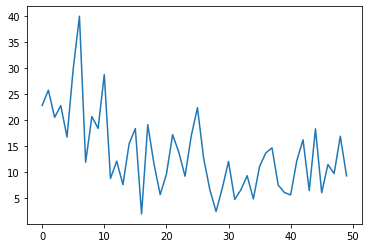

In [6]:
plt.plot(array)
plt.show()

# The convergence phases of the Euclidean norm function with constant step size

---

We Apply the (1+1) - ES algorithm to minimize the euclidean norm function squard with a constant step size

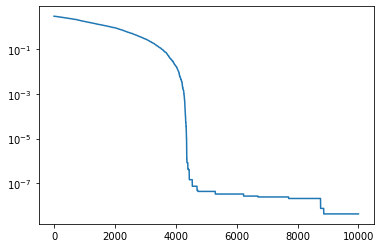

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random

def func(x):
  value = sum(map(lambda t: t * t, x))
  return value

m=[1,1,1]
segma=0.001
kmax=10000
k=0
values = []
while k<=kmax:
  k+=1
  y= np.random.normal(0, 1, size = 3)
  x= m+segma*y
  if func(x)<= func(m):
    m=x
  values.append(func(m))


plt.plot(values)
plt.yscale('log')
plt.show()
   


# Exercices of December 2nd 2022

## II Adaptive step-size algorithms

http://www.cmap.polytechnique.fr/~anne.auger/teaching-slides/Exercices-class2.pdf 


### Question one

the condition number for the sphere function is $1$ while for the ellipse functions it is very high which is $10^4$

### Question two

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from numpy import random

def f_sphere(x):
  value = sum(map(lambda t: t * t, x))
  return value

def f_elli(x):
  k=0
  n=len(x)
  for i in range(n):
    k+=(100**((i-1)/(n-1))*x[i])**2
  return k



### Question three I

In [9]:
def oneplusoneES(mean, sigma, Kmax,f):
  k = 0
  function_values = []
  while k <= Kmax:
    k+=1
    x = mean + sigma * np.random.normal(0 , 1, size = len(mean))
    if f(x)<=f(mean):
      mean=x 
    function_values.append(f(mean))
  return function_values

### Question three II & III

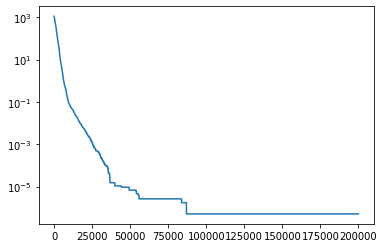

In [10]:
v=oneplusoneES(np.ones(5), 1e-3 , 2e5,f_elli)
plt.plot(v)
plt.yscale('log')
plt.show()

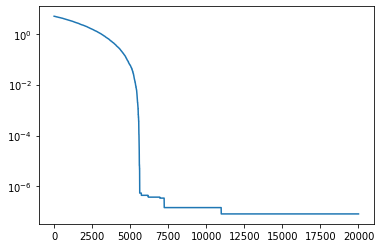

In [11]:
v=oneplusoneES(np.ones(5), 1e-3 , 2e4,f_sphere)
plt.plot(v)
plt.yscale('log')
plt.show()

### Question three V

## Now with step size adaptation using one fifth success rule

Define the algorithm

In [12]:
def oneplusoneES_onefifth(mean, sigma, Kmax,f):
  k = 0
  function_values = []
  stepsize = []
  while k <= Kmax:
    k+=1
    x = mean + sigma * np.random.normal(0 , 1, size = len(mean))
    if f(x)<=f(mean):
      mean=x 
      sigma=1.5*sigma
    else:
      sigma=sigma*((1.5)**(-1/4))
    stepsize.append(sigma)
    function_values.append(f(mean))
  return function_values , stepsize 

On sphere function 

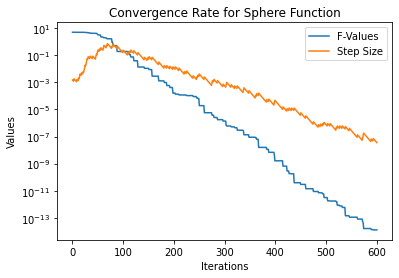

In [13]:
v , u  = oneplusoneES_onefifth(np.ones(5), 1e-3 , 600, f_sphere)
plt.plot(v)
plt.plot(u)
plt.yscale('log')
plt.xlabel("Iterations")
plt.ylabel("Values")
plt.legend(["F-Values", "Step Size"])
plt.title('Convergence Rate for Sphere Function')
plt.show()

with sqaure root of function values 

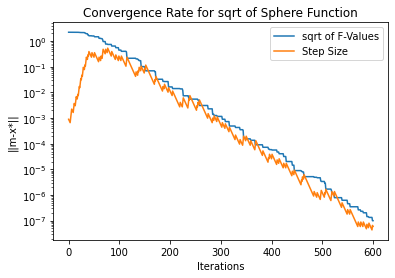

In [14]:
v , u  = oneplusoneES_onefifth(np.ones(5), 1e-3 , 600, f_sphere)
plt.plot(np.sqrt(v))
plt.plot(u)
plt.yscale('log')
plt.xlabel("Iterations")
plt.ylabel("||m-x*||")
plt.legend(["sqrt of F-Values", "Step Size"])
plt.title('Convergence Rate for sqrt of Sphere Function')
plt.show()

### Question three VI

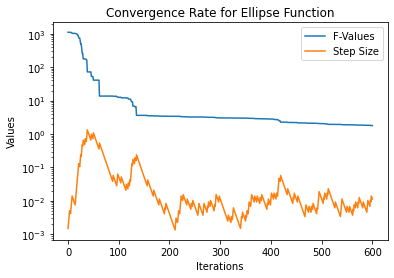

In [15]:
v , u  = oneplusoneES_onefifth(np.ones(5), 1e-3 , 600, f_elli)
plt.plot(v)
plt.plot(u)
plt.yscale('log')
plt.xlabel("Iterations")
plt.ylabel("Values")
plt.legend(["F-Values", "Step Size"])
plt.title('Convergence Rate for Ellipse Function')
plt.show()

Convergence slower in ellipse because it has a high condition number

### Question three VII

In [16]:
def f_Rosenbrock(x):
  k=0
  n=len(x)
  for i in range(n-1):
    k+= 100*(x[i]**2-x[i+1])**2+(x[i]-1)**2
  return k

In [17]:
f_Rosenbrock([1,2,1])

1001

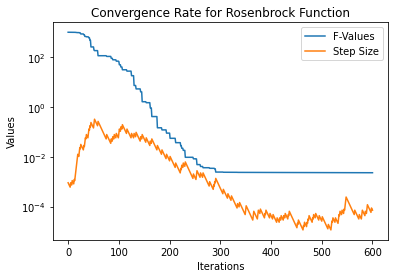

In [18]:
v , u  = oneplusoneES_onefifth([1,2,1,1,1], 1e-3 , 600, f_Rosenbrock) # when we start np.ones it is the optimal ==> no update 
plt.plot(v)
plt.plot(u)
plt.yscale('log')
plt.xlabel("Iterations")
plt.ylabel("Values")
plt.legend(["F-Values", "Step Size"])
plt.title('Convergence Rate for Rosenbrock Function')
plt.show()

### Question 3 VIII

In [19]:
def g_sphere(x):
  u = (f_sphere(x))**(1/4)
  return u
def g_elli(x):
  u = (f_elli(x))**(1/4)
  return u

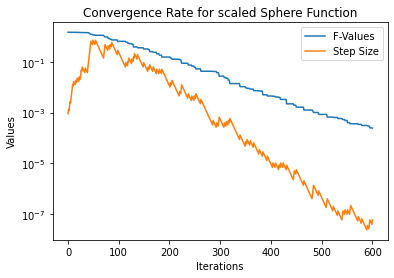

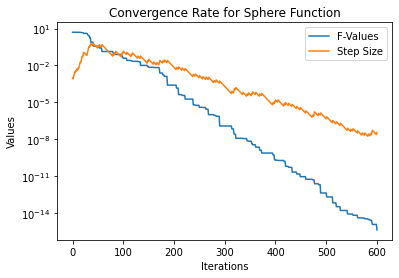

In [20]:
v , u  = oneplusoneES_onefifth(np.ones(5), 1e-3 , 600, g_sphere)
plt.plot(v)
plt.plot(u)
plt.yscale('log')
plt.xlabel("Iterations")
plt.ylabel("Values")
plt.legend(["F-Values", "Step Size"])
plt.title('Convergence Rate for scaled Sphere Function')
plt.show()

v , u  = oneplusoneES_onefifth(np.ones(5), 1e-3 , 600, f_sphere)
plt.plot(v)
plt.plot(u)
plt.yscale('log')
plt.xlabel("Iterations")
plt.ylabel("Values")
plt.legend(["F-Values", "Step Size"])
plt.title('Convergence Rate for Sphere Function')
plt.show()

In [21]:
from numpy import linalg as LA
def oneplusoneES_onefifth_distance(mean, sigma, Kmax,f):
  k = 0
  function_values = []
  stepsize = []
  while k <= Kmax:
    k+=1
    x = mean + sigma * np.random.normal(0 , 1, size = len(mean))
    if f(x)<=f(mean):
      mean=x 
      sigma=1.5*sigma
    else:
      sigma=sigma*((1.5)**(-1/4))
    stepsize.append(sigma)
    function_values.append(LA.norm(mean))
  return function_values , stepsize 

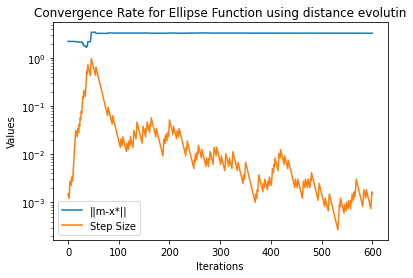

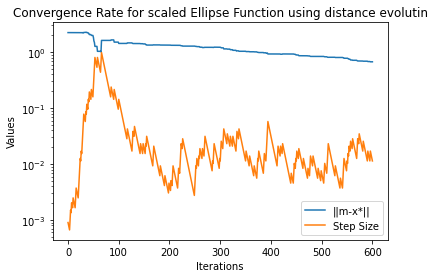

In [22]:
v , u  = oneplusoneES_onefifth_distance(np.ones(5), 1e-3 , 600, f_elli)
plt.plot(v)
plt.plot(u)
plt.yscale('log')
plt.xlabel("Iterations")
plt.ylabel("Values")
plt.legend(["||m-x*||", "Step Size"])
plt.title('Convergence Rate for Ellipse Function using distance evolutin')
plt.show()

v , u  = oneplusoneES_onefifth_distance(np.ones(5), 1e-3 , 600, g_elli)
plt.plot(v)
plt.plot(u)
plt.yscale('log')
plt.xlabel("Iterations")
plt.ylabel("Values")
plt.legend(["||m-x*||", "Step Size"])
plt.title('Convergence Rate for scaled Ellipse Function using distance evolutin')
plt.show()

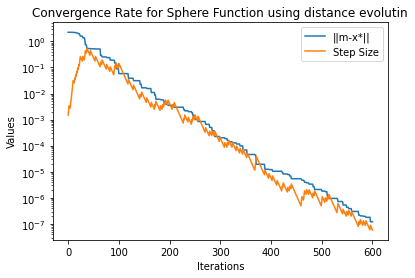

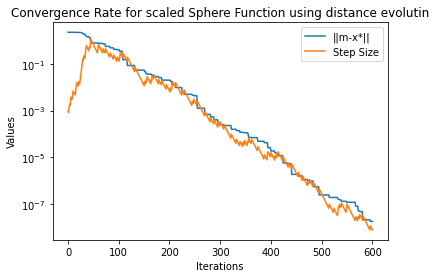

In [23]:
v , u  = oneplusoneES_onefifth_distance(np.ones(5), 1e-3 , 600, f_sphere)
plt.plot(v)
plt.plot(u)
plt.yscale('log')
plt.xlabel("Iterations")
plt.ylabel("Values")
plt.legend(["||m-x*||", "Step Size"])
plt.title('Convergence Rate for Sphere Function using distance evolutin')
plt.show()

v , u  = oneplusoneES_onefifth_distance(np.ones(5), 1e-3 , 600, g_sphere)
plt.plot(v)
plt.plot(u)
plt.yscale('log')
plt.xlabel("Iterations")
plt.ylabel("Values")
plt.legend(["||m-x*||", "Step Size"])
plt.title('Convergence Rate for scaled Sphere Function using distance evolutin')
plt.show()

# Exercices of January 6th 2023

## II  Running and Understanding CMA-ES

http://www.cmap.polytechnique.fr/~anne.auger/teaching-slides/DFO-exercicesCMA.pdf 


Installing and importing the CMA library

In [24]:
!pip install cma
import cma
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.7/260.7 KB 16.1 MB/s eta 0:00:00


## Question One 

Ellipse Function on 10D

(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 10 (seed=507084, Tue Feb 14 20:49:36 2023)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 5.884604021910436e+03 1.0e+00 2.92e-01  3e-01  3e-01 0:00.0
    2     20 6.385754879933419e+03 1.2e+00 2.70e-01  2e-01  3e-01 0:00.0
    3     30 9.030058755693297e+03 1.3e+00 2.44e-01  2e-01  3e-01 0:00.0
  100   1000 3.872946401207678e+00 4.1e+01 6.07e-03  4e-04  1e-02 0:00.2
  200   2000 1.110200877416644e-01 3.0e+02 8.97e-03  1e-04  4e-02 0:00.3
  300   3000 1.666631843316526e-03 6.1e+02 2.45e-03  1e-05  7e-03 0:00.5
  400   4000 1.032770833233850e-10 9.9e+02 2.87e-06  6e-09  5e-06 0:00.6
  462   4620 1.871828386413785e-14 1.0e+03 5.03e-08  6e-11  5e-08 0:00.8
termination on tolfun=1e-11 (Tue Feb 14 20:49:37 2023)
final/bestever f-value = 1.287415e-14 9.277835e-15 after 4621/4593 evaluations
incumbent solution: [ 4.27560942e-08  3.89940792e-09 -8.96347167e-09  7.78333390e-09
 -6.08840013e-10  4.15150078e-10 

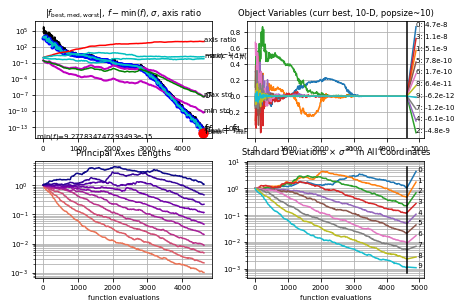

In [25]:
res = cma.fmin(cma.ff.elli, [0.1] * 10, 0.3)
cma.plot()

Tablet Function on 10D

(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 10 (seed=439784, Tue Feb 14 20:49:39 2023)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 3.883924607941577e+02 1.0e+00 2.92e-01  3e-01  3e-01 0:00.0
    2     20 4.139023240981131e+02 1.2e+00 2.77e-01  3e-01  3e-01 0:00.0
    3     30 4.381950510766887e+03 1.3e+00 2.74e-01  2e-01  3e-01 0:00.0
  100   1000 4.478160203651819e-01 1.1e+02 4.85e-02  7e-04  6e-02 0:00.1
  200   2000 9.617906702970728e-07 1.2e+03 7.58e-04  6e-07  5e-04 0:00.3
  300   3000 1.056654599739414e-12 1.1e+03 1.47e-06  4e-10  4e-07 0:00.4
  323   3230 3.827946501047115e-14 1.2e+03 3.51e-07  8e-11  8e-08 0:00.5
termination on tolfun=1e-11 (Tue Feb 14 20:49:40 2023)
final/bestever f-value = 1.323435e-14 1.323435e-14 after 3231/3231 evaluations
incumbent solution: [ 6.80330703e-11 -2.45237440e-08  5.03717932e-08 -3.29542855e-08
  2.10713632e-08  3.72169838e-08  2.42308665e-08 -3.74875667e-08 ...]
std deviations: [7.98690135e-11 7.24

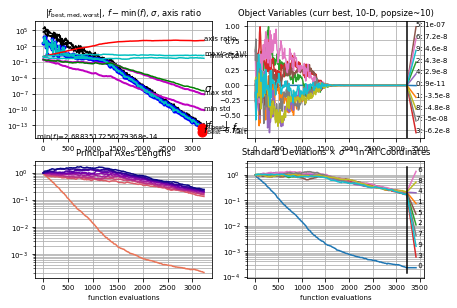

In [26]:
res = cma.fmin(cma.ff.tablet, [0.1] * 10, 0.3)
cma.plot()

## Question Two:

 Explain the different plots that appear on the screen


## Question Three:

Identify and explain the two main (convergence) phases observed

## Question Four: 

What is the relationship between the eigenvalues of the covariance matrix in the end and the
eigenvalues of the Hessian matrix of the functions?

## Question Five:

Connect the asymptotic convergence rate on the convex quadratic function that corresponds to the
slope of the last part of the convergence graph with the convergence rate on the sphere function.
Explain.

## Question Six: 

Now a rotated ellipse function: 

$f_{ellirot}(x)$ is defined by $f_{ellirot}(x) = f_{elli}(Px)$ where P is a rotation matrix (sampled uniformly among the rotation matrices).

(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 10 (seed=558832, Tue Feb 14 20:49:41 2023)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 1.390477864646748e+04 1.0e+00 2.61e-01  3e-01  3e-01 0:00.0
    2     20 5.583498282961516e+03 1.1e+00 2.38e-01  2e-01  2e-01 0:00.0
    3     30 3.833460605087894e+03 1.2e+00 2.17e-01  2e-01  2e-01 0:00.0
  100   1000 9.167041160092047e+00 3.9e+01 1.55e-02  9e-03  3e-02 0:00.2
  200   2000 6.021737319179022e-03 2.1e+02 1.18e-03  4e-04  2e-03 0:00.5
  300   3000 1.532286125726415e-04 5.4e+02 5.58e-04  2e-04  1e-03 0:00.7
  400   4000 5.510763196302952e-11 1.1e+03 1.43e-06  2e-07  2e-06 0:00.9
  449   4490 5.078765074911297e-14 1.3e+03 5.66e-08  6e-09  5e-08 0:00.9
termination on tolfun=1e-11 (Tue Feb 14 20:49:42 2023)
final/bestever f-value = 3.255275e-14 3.255275e-14 after 4491/4491 evaluations
incumbent solution: [ 7.70500173e-09 -1.28533334e-08  2.41029465e-08  7.17614516e-09
 -1.50958870e-08 -2.17660172e-08 

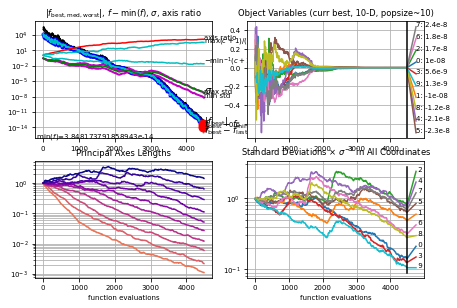

In [27]:
res = cma.fmin(cma.ff.ellirot, [0.1] * 10, 0.3)
cma.plot()

## Question Seven:

Compare now the convergence rate of CMA-ES and of the (1 + 1)-ES with one-fifth success rule on $f_{elli−2}(x) = \sum_{i=1}^n((10^2 )^{ \frac{i−1}{ n−1}} x_i)^2$ for n = 10. 

For this you can for instance report the number of function evaluations that both algorithms need to reach 10−6 for 6 different runs. Explain the differences observed.

**(1+1)-ES:**

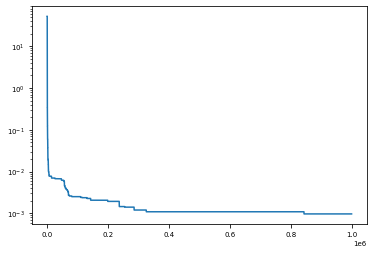

In [28]:
v=oneplusoneES([0.1]*10, 0.003 , 1e6,f_elli)  # Different step size values yields different outputs
plt.plot(v)
plt.yscale('log')
plt.show()

**CMA-ES:**

(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 10 (seed=493151, Tue Feb 14 20:50:20 2023)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 5.391988928089577e+01 1.0e+00 2.88e-03  3e-03  3e-03 0:00.0
    2     20 4.933414585328691e+01 1.2e+00 3.16e-03  3e-03  3e-03 0:00.0
    3     30 4.590426703210826e+01 1.3e+00 3.58e-03  3e-03  4e-03 0:00.0
  100   1000 3.137899193343766e-02 1.7e+01 7.12e-03  1e-03  1e-02 0:00.2
  200   2000 9.293568244059196e-06 7.6e+01 4.19e-04  1e-05  1e-03 0:00.4
  300   3000 3.298603499740598e-12 9.4e+01 1.11e-06  1e-08  1e-06 0:00.8
  335   3350 9.859832474129690e-15 9.1e+01 1.09e-07  1e-09  9e-08 0:00.9
termination on tolfun=1e-11 (Tue Feb 14 20:50:21 2023)
final/bestever f-value = 9.529857e-15 9.529857e-15 after 3351/3351 evaluations
incumbent solution: [-6.53684363e-09  3.30400668e-08  2.20964352e-08  1.72376058e-08
  9.20409265e-09  2.08676028e-09 -4.85770821e-10 -3.44552823e-10 ...]
std deviations: [8.85025999e-08 6.83

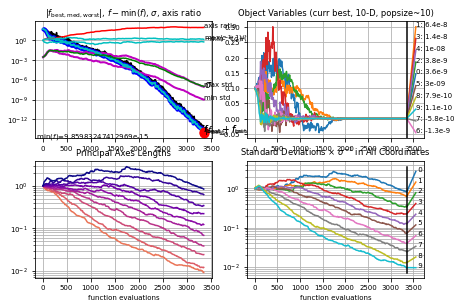

In [29]:
res = cma.fmin(f_elli, [0.1] * 10, 0.003)
cma.plot()

## Question Eight:

We consider now the Rastragin Function and we want to show it is multimodal

(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 10 (seed=583305, Tue Feb 14 20:50:22 2023)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 8.140332928879319e+01 1.0e+00 2.81e-01  3e-01  3e-01 0:00.0
    2     20 8.345222940862431e+01 1.2e+00 2.84e-01  3e-01  3e-01 0:00.0
    3     30 8.648463473199784e+01 1.3e+00 2.77e-01  3e-01  3e-01 0:00.0
  100   1000 3.979980709707547e+00 1.9e+00 6.75e-04  3e-04  3e-04 0:00.1
  200   2000 3.979836228523610e+00 1.8e+00 2.33e-06  4e-07  5e-07 0:00.3
  257   2570 3.979836228373188e+00 1.8e+00 3.42e-08  3e-09  4e-09 0:00.4
termination on tolfun=1e-11 (Tue Feb 14 20:50:23 2023)
final/bestever f-value = 3.979836e+00 3.979836e+00 after 2571/2519 evaluations
incumbent solution: [ 9.94958638e-01 -3.93228949e-09 -3.10303696e-09  3.58191008e-10
 -5.64443528e-10  9.94958633e-01  9.94958635e-01 -4.10441463e-09 ...]
std deviations: [3.20866244e-09 3.61523526e-09 3.90229662e-09 3.70101650e-09
 3.80082331e-09 3.44272724e-09 3

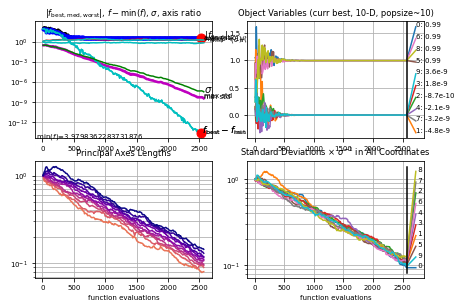

In [30]:
res = cma.fmin(cma.ff.rastrigin , np.random.random(10), 0.3)
cma.plot() 

## Question Nine:

The default population size (the parameter $λ$) in CMA-ES equals $4 + (3 \log(n))$. Run 5 times
the CMA-ES algorithm with its default population size to minimize the Rastrigin function in
dimension 10 starting with a point sampled according to rand(10,1) and with initial step-size
equal to 10: (cmaes(’frastrigin’,rand(10,1),10)). Mesure the success probability. Realize the
same experiment by multiplying the default population size by 2, 4, 8, 16, 32. What do you observe?
Explain.


(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 10 (seed=571130, Tue Feb 14 20:50:24 2023)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 4.815277170058910e+02 1.0e+00 8.87e+00  9e+00  9e+00 0:00.0
    2     20 2.759002674385564e+02 1.1e+00 7.92e+00  8e+00  8e+00 0:00.0
    3     30 2.828557135761366e+02 1.2e+00 7.15e+00  7e+00  7e+00 0:00.0
  100   1000 3.146174555998380e+01 3.8e+00 1.95e-01  6e-02  2e-01 0:00.2
  200   2000 8.954633551331483e+00 1.9e+00 3.03e-04  6e-05  9e-05 0:00.3
  300   3000 8.954626476021218e+00 1.7e+00 2.22e-07  2e-08  2e-08 0:00.5
  323   3230 8.954626476020593e+00 2.0e+00 6.28e-08  4e-09  5e-09 0:00.5
termination on tolfun=1e-11 (Tue Feb 14 20:50:25 2023)
final/bestever f-value = 8.954626e+00 8.954626e+00 after 3231/3231 evaluations
incumbent solution: [-1.86198991e-09  3.60523147e-10 -9.94958638e-01 -3.93007415e-10
  9.94958641e-01  5.64002718e-09  1.98991223e+00  9.94958637e-01 ...]
std deviations: [4.49756696e-09 4.54

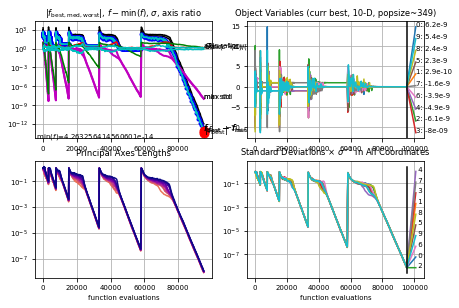

In [31]:
res = cma.fmin(cma.ff.rastrigin , np.random.random(10) , 10  , restarts = 5)        
cma.plot()

(16_w,32)-aCMA-ES (mu_w=9.2,w_1=19%) in dimension 10 (seed=472443, Tue Feb 14 20:50:39 2023)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     32 5.338204231832458e+02 1.0e+00 9.04e+00  8e+00  9e+00 0:00.0
    2     64 4.413753129903841e+02 1.2e+00 7.57e+00  7e+00  7e+00 0:00.0
    3     96 3.256367566098482e+02 1.4e+00 6.79e+00  6e+00  7e+00 0:00.0
  100   3200 3.982725874278074e+00 1.6e+00 1.40e-02  2e-03  2e-03 0:00.3
  195   6240 3.979836228373330e+00 1.7e+00 1.44e-06  1e-08  1e-08 0:00.6
termination on tolfun=1e-11 (Tue Feb 14 20:50:40 2023)
final/bestever f-value = 3.979836e+00 3.979836e+00 after 6241/6241 evaluations
incumbent solution: [-1.27442964e-09 -9.94958644e-01  2.77874664e-09  6.03869304e-09
 -9.94958638e-01  3.12866638e-09 -2.63286905e-10 -9.94958640e-01 ...]
std deviations: [1.12743655e-08 1.04667913e-08 1.14226813e-08 1.11044234e-08
 1.10394566e-08 1.15956594e-08 1.08011002e-08 1.32438217e-08 ...]
(32_w,64)-aCMA-ES (mu_w=17.6,w_1=11%) 

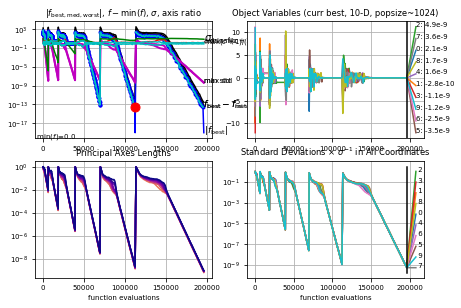

In [32]:
res = cma.fmin(cma.ff.rastrigin , np.random.random(10) , 10 ,  {'popsize':32} , restarts = 5)        
cma.plot()

(16_w,32)-aCMA-ES (mu_w=9.2,w_1=19%) in dimension 10 (seed=515271, Tue Feb 14 20:51:19 2023)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     32 4.208541696271785e+02 1.0e+00 9.14e+00  9e+00  9e+00 0:00.0
    2     64 4.797026799630652e+02 1.2e+00 8.01e+00  7e+00  8e+00 0:00.0
    3     96 3.137781408571565e+02 1.2e+00 7.38e+00  7e+00  7e+00 0:00.0
  100   3200 4.017840086362099e+00 1.6e+00 4.76e-02  6e-03  8e-03 0:00.3
  200   6400 3.979836228373642e+00 1.5e+00 3.52e-06  2e-08  3e-08 0:00.8
  209   6688 3.979836228373216e+00 1.7e+00 1.34e-06  7e-09  8e-09 0:00.8
termination on tolfun=1e-11 (Tue Feb 14 20:51:20 2023)
final/bestever f-value = 3.979836e+00 3.979836e+00 after 6689/6689 evaluations
incumbent solution: [ 2.77846748e-09 -3.23906018e-09 -8.11364918e-10  9.94958636e-01
 -9.94958641e-01  9.94958642e-01  7.69771320e-10  5.07648778e-11 ...]
std deviations: [7.12592668e-09 8.29285482e-09 7.91341324e-09 7.86588802e-09
 7.00195607e-09 7.24204579e-09 

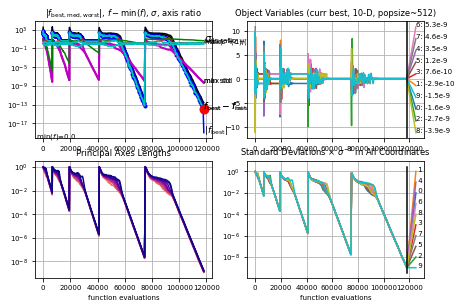

In [33]:
res = cma.fmin(cma.ff.rastrigin , np.random.random(10) , 10 ,  {'popsize':32} , restarts = 4)        
cma.plot()